## Engaging Complexity
### Quiz 2

#### Github link:  https://github.com/DariusTata/engagingcomplexity

*Notation: log denotes logarithm base 10, ln denotes natural logarithm.*

_1. (3 points) The relative growth rate of world population has been drecreasing steadily in recent years. On the basis of this, some population models predict that world population will eventually stabilise at a level that the planet can support. One such logisitical model is:_

$P(t) = 73.2/{6.1+5.9e^{-0.02t}}$

where t=0 is the year 2000 and population P is measured in billions.

(a) What world population does this model predict for the year 2200? For 2300?

**(a)**

In [116]:
import math

def world_pop(t):
    #normalise t for the model
    t = t -2000
    #after normalisation, if t is less than 0 the year is out of bounds.
    if t<0:
        P=-1
    #calculate t using model formula
    else:
        P = 73.2/(6.1+(5.9*(math.e)**(-0.02*t)))
    return(P)

In [117]:
#call function passing year difference as arg
world_pop(2200)

11.79111884239547

In [118]:
#call function passing year difference as arg
world_pop(2300)

11.971299030684262

* Our input data only has 1 significant figure; **The model predicts a population of 12 billion for the year 2200 and 2300**, when rounding to 2 significant figures.
* Without rounding there is a small difference between the two answers, however this represents a difference of 180 million people - which is a lot. The model's prediction precion is therefore limited by the precision of the input data.

(b) Sketch a graph of the function P for the years 2000 to 2500.

**(b)**

In [119]:
import pandas as pd

#create a dictionary with values for r from 10 to 100 and placeholder floats for T
q1 = {
    't (Year)': list(range(2000,2501))
}
q1_P = {
    'P (Billions of People)': [0.0] * len(q1['t (Year)'])
}
#merge the dictionaries
q1.update(q1_P)

#create dataframe from dictionaries
q1_df = pd.DataFrame(data=q1)
q1_df

,t (Year),P (Billions of People)
0,2000,0.0
1,2001,0.0
2,2002,0.0
3,2003,0.0
4,2004,0.0
...,...,...
496,2496,0.0
497,2497,0.0
498,2498,0.0
499,2499,0.0


In [120]:
#update P values in dataframe
for i, row in q1_df.iterrows():
    #comparing via index
    if i+2000 == row['t (Year)']:
        #iterate world_pop function over the Year column
        pop = world_pop(row['t (Year)'])
        #selecting the cell to update
        q1_df.at[i, 'P (Billions of People)'] = round(pop, 4)

q1_df

,t (Year),P (Billions of People)
0,2000,6.1000
1,2001,6.1600
2,2002,6.2199
3,2003,6.2798
4,2004,6.3396
...,...,...
496,2496,11.9994
497,2497,11.9994
498,2498,11.9995
499,2499,11.9995


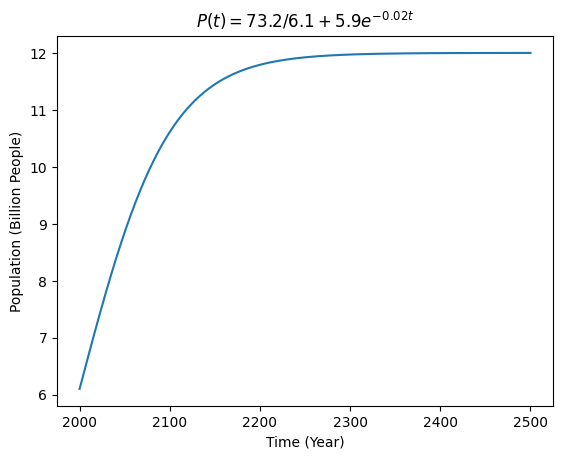

In [121]:
import matplotlib.pyplot as plt

#plotting the function
fig, ax = plt.subplots()
ax.plot(q1_df['t (Year)'], q1_df['P (Billions of People)'])
ax.set(xlabel='Time (Year)', ylabel='Population (Billion People)',
       title='$P(t) = 73.2/{6.1+5.9e^{-0.02t}}$')

plt.show()

(c) What size does the world population approach as time goes on?

**(c)**

* As t becomes larger, P approaches 12 asymptotically.
* As time goes on, the world population approaches 12 billion asymptotically.

_2. (2 points)  
(a) A radioactive substance decays in such a way that the amount of mass remaining after t days is given by the function:_

$m(t) = 13e^{-0.015t}$

where m(t) is measured in kilograms. Find the mass at time t = 0. How much of the mass remains after 45 days?

**(a)**

In [122]:
def mass_remaining(t):
    if t<0:
        m=-1
    else:
        m=13*(math.e)**-(0.015*t)
    return(m)

In [123]:
mass_remaining(0)

13.0

* After no time has passed (t = 0) there is 13Kg of substance.

In [124]:
mass_remaining(45)

6.61903346789814

* After 45 days has passed there is 6.6Kg of stubstance.
* Again, limited by input data and unknown precision of the model; I haved rounded to 1 decimal place.

_(b) When a certain medical drug is administered to a patient, the number of milligrams remaining in the patient's bloodstream after t hours is modeled by:_

$D(t) = 50e^{−0.2t}$

What is the half life of the drug? (i.e. the time required for the quantity of the drug to reduce to half of its initial value.)

**(b)**

Let's rearrange the fomula as an expression of t.  
$D = 50e^{−0.2t}$  
$D/50 = e^{-0.2t}$  
$ln(D/50) = -0.2t$
  
(note: $-0.2 = -1/5$ )

$-5ln(D/50) = t$

New expression: $t(D) = -5ln({D/50})$  
The question is now: find t when D is 0.5

In [125]:
#math.log() accepts two args, the second being the base.
# If left empty it uses base e
t = -5*math.log(0.5/50)
print(t)

23.025850929940454


* The half life of the drug is 23 days.

_3. (3 points)  
(a) A certain strain of bacteria divides every 3 hours. If a colony is started with 50 bacteria, then the time t (in hours) required for the colony to grow to N bacteria is given by:_

$t = log(N/50) / log(2)$

Find the time required for the colony to grow to a million bacteria.

**(a)**
  
Change of base rule: $log_a b = (log_c b) / (log_c a)$

Applying this rule gives: $t = log_2(N/50)$  
Find t when N = 1,000,000

In [126]:
t=math.log(1000000/50,2)
print(t)

14.287712379549449


* It would take 14 hours for the colony to grow a million bacteria.

_(b) The time required to double the amount of an investment at an interest rate r compounded continuously is given by:_

$t = ln(2)/r$

Find the time required to double an investment at 6%, 7%, and 8%.

**(b)**

In [130]:
def double_investment(r):
    t=math.log(2)/r
    return t

print(double_investment(0.06))
print(double_investment(0.07))
print(double_investment(0.08))

11.552453009332423
9.902102579427789
8.664339756999317


* At an interest rate of 6%, the time taken to double an investment is 11.55 Years.
* At an interest rate of 7%, the time taken to double an investment is 9.90 Years.
* At an interest rate of 8%, the time taken to double an investment is 8.66 Years.
* This model doesn't specifiy units for time. I have assumed years as interest rate is typically given as APR (Annual Percentage Rate).

_(c) The rate at which a battery charges is slower the closer the battery is to its maximum charge $C_0$. The time (in hours) required to charge a fully discharged battery to a charge $C$ is given by:_

$t = -k \cdot ln(1-C/C_0)$

Where k is a positive constant that depends on the battery.

For a certain battery, k = 0.25  
If this battery is fully discharged, how long will it take to charge to 90% of its maximum charge $C_0$?

**(c)**

It seems battery charge $C$ and $C_0$ are expressed as percentages.  
I will use $C=0.9$ and $C_0=1$  
Evaluating inside the backets:  
$1- 0.9/1 = 0.1$

In [128]:
t=-0.25*(math.log(0.1))

#result for t above is less than 1, convert to minutes
print(t*60)

34.538776394910684


* It will take 34 and a half minutes to charge the battery from fully discharged to 90% maximum charge.

_4. (2 points) Vilfredo Pareto (1848-1923) observed that most of the wealth of a country is owned by a few members of the population. Pareto's Principle is:  
$log(P) = log(c) -k \cdot log(W)$  
Where W is the wealth level (how much money a person has) and P is the number of people in the population having that much money._

(a) Solve the equation for P.  
**(a)**

$k \cdot log(W) = log(c) - log(P)$  
Logarithmic subtraction rule: $log(a/b) = log(a) - log(b)$  
Applying this rule gives:  
$k \cdot log(W) = log(c/P)$  
Another log rule: $log(a^b) = b \cdot log(a)$  
$log(W^k) = log(c/P)$  
Exponenting both sides for log base 10 gives:  
$W^k = c/P$  
$P = c/(W^k)$

_(b) Assume that k = 2.1 and c = 8000, and that W is measured in millions of dollars.  
Use part (a) to find the number of people who have two million dollars or more.  
How many people have ten million dollars or more?_

**(b)**

In [129]:
#This question is about evaluating P(W)

def Pareto_People(W):     
    P=8000/(W**2.1)
    return P

print(Pareto_People(2))
print(Pareto_People(10))

1866.065983073615
63.546258777942505


* 1866 People have two million dollars or more.
* 63 People have 10 million dollars or more.